# Objective: Predict whether a person has diabetes based on medical features.

In [1]:
import pandas as pd
import numpy as np

# STEP 1: Data Preprocessing

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols:
    df[col] = df[col].replace(0,df[col].mean())

In [8]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

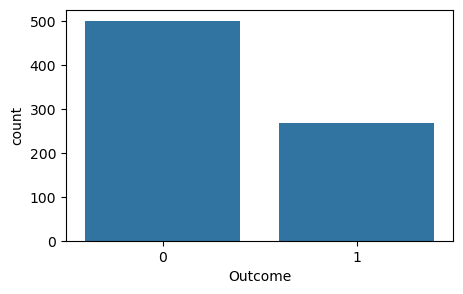

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(x = 'Outcome', data = df)
plt.show()

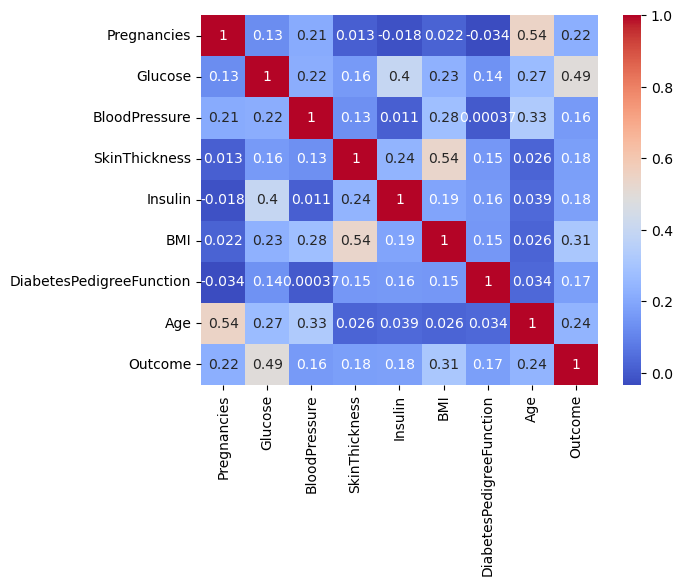

In [11]:
sns.heatmap(data = df.corr(),annot=True,cmap='coolwarm')
plt.show()

# TRAINING AND TESTING

In [12]:
x = df.drop(columns='Outcome')
y = df['Outcome']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
x_train.shape
x_test.shape

(231, 8)

# MODEL SELECTION

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [17]:
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score,confusion_matrix,roc_curve,auc

In [18]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel = 'linear', probability=True),
    "Naive Bayes": GaussianNB(),
}

metrics={
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
}

for model_name, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1)

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression  0.740260   0.635135  0.5875  0.610390
1        Random Forest  0.740260   0.621951  0.6375  0.629630
2        Decision Tree  0.692641   0.546392  0.6625  0.598870
3                  SVM  0.744589   0.643836  0.5875  0.614379
4          Naive Bayes  0.740260   0.621951  0.6375  0.629630




conclusion: 
1. SVM has the highest accuracy (0.7445), meaning it correctly classifies the most cases overall.
2. Random Forest and Naïve Bayes have the highest F1-score (0.6296), meaning they balance precision & recall well.
3. Decision Tree performs the worst (0.6926 accuracy, lowest F1-score 0.5988), suggesting overfitting or inefficiency.
4. Logistic Regression is decent (0.7402 accuracy, F1-score 0.6103), meaning it's a good baseline model.

# Hyperparameter Tuning

In [19]:
import optuna

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
def objective(trial):
        c = trial.suggest_float('C', 0.1, 100, log=True)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

        model = SVC(C=c, kernel=kernel, gamma=gamma, random_state=42)
        score = cross_val_score(model, x_train, y_train, cv=3, scoring='accuracy').mean()
        return score

In [22]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective,n_trials=60)

[I 2025-03-29 22:50:53,654] A new study created in memory with name: no-name-38eeaa57-0b1e-475c-ba32-fa7e5cec3b08
[I 2025-03-29 22:50:53,716] Trial 0 finished with value: 0.7057728119180634 and parameters: {'C': 10.17602318923963, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 0 with value: 0.7057728119180634.
[I 2025-03-29 22:50:53,760] Trial 1 finished with value: 0.7672253258845437 and parameters: {'C': 0.7614424977934563, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 1 with value: 0.7672253258845437.
[I 2025-03-29 22:50:53,796] Trial 2 finished with value: 0.7188081936685289 and parameters: {'C': 7.152565600872291, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 1 with value: 0.7672253258845437.
[I 2025-03-29 22:50:54,054] Trial 3 finished with value: 0.7746741154562384 and parameters: {'C': 96.75195201183988, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 3 with value: 0.7746741154562384.
[I 2025-03-29 22:50:54,104] Trial 4 finished with value: 0.7486033519553073 a

In [23]:
print(f'Best Hyperparamters: {study.best_trial.params}')
print(f'Best Trial Accuracy: {study.best_trial.value}')

Best Hyperparamters: {'C': 0.10048794007704676, 'kernel': 'linear', 'gamma': 'auto'}
Best Trial Accuracy: 0.7802607076350094


In [24]:
bt_model = SVC(**study.best_trial.params, random_state=42)

# Fit the model to the training data
bt_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = bt_model.predict(x_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

# Print the test accuracy
print(f'Test Accuracy with best hyperparameters: {test_accuracy:.2f}')

Test Accuracy with best hyperparameters: 0.75


In [37]:
new_sample = np.array([[6, 148.0, 72.0, 35.0, 79.799479, 33.6, 0.627, 50]])
prediction = bt_model.predict(new_sample)
predicted_class = prediction[0]
print("Prediction: ", "Diabetic" if predicted_class == 1 else "Non-Diabetic")

Prediction:  Diabetic


In [38]:
print(x.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


# SAVING THE MODEL

In [39]:
import pickle

In [40]:
filename = 'Diabetes_model.sav'
pickle.dump(bt_model, open(filename,'wb'))

In [41]:
loaded_model = pickle.load(open('C:/Users/TTBSADMIN/HEALTHCARE/Diabetes_model.sav','rb'))

In [45]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')
     

[1]
The person is diabetic


In [42]:
for column in x.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


In [43]:
import os
print(os.path.exists('Diabetes_model.sav'))  # Output: True or False


True


In [44]:
import os
print(os.getcwd())  # Shows where your script is running


C:\Users\TTBSADMIN\HEALTHCARE
